**For this exercise, I have created dummy data for procedure attirbutes, procedure success and procedure outcomes. While creating, I have made sure that there are missing values in the data, which is similar to the real world data. As, I am not very experienced in the Procedures and its nomenclature, I have assumed only the following features into my dataset. **


**Data Dictionary**


Procedure_attributes:
1. Procedure_ID : Unique for every record. (Primary Key)
2. Procedure : I taken few examples from wikipedia about types of procedures and used those. I have used around 13 different procedures.
3. Time( in hours) : Time taken to complete the procedure.
4. Severity : Serverity of the Procedure. ( Have 4 categories : Low, Medium, High and Nulls)
5. Gender : Gender of the Patient undergoing procedure. ( Male, Female, Nulls)
6. Anesthesia : Was the patient administried with Anesthesia (Yes, No)
7. Diabetes : Does the patient has diabetes or not. (Yes, No, Nulls)

Procedure_success:

1. Procedure_ID : Unique for every record. (Primary Key)
2. Outcome : For every procedure, what is the outcome ?


Procedure_outcomes:

1. Procedure_ID :  Unique for every record. (Primary Key)
2. Severity of post procedure complications : Does the patient has any complications after procedure. (High, Low, Nulls)
3. Recurrence of original condition : Does the patient has recurred with the original condition. (Yes, No, Nulls)
4. Pain : Does the patient has pain after the procedure. (Yes, No, Nulls)


Link to my Github respository : https://github.com/Nikhileshorg/CMS_data

Based on the problem statment given, this is a classification type of problem. I have choosen xgb as the algorithm and Hyperopt as the optimization technique. I have tried Lightgbm as well but due to less data, it was not giving good accuracy scores. Based on the dataset. This is a classification type of problem.







In [25]:
#####Importing the required libraries

import pandas as pd ###pandas
import numpy as np  ###numpy
import json
import urllib    ###urlib for retrieving data from a url
import requests  ###requests
from scipy import interp
import seaborn as sns
import matplotlib.pyplot as plt  ###for visualizations
get_ipython().run_line_magic('matplotlib', 'inline')
from matplotlib import rcParams

In [ ]:
###In this cell, I have created dummy functions for get_procedure_attributes, get_procedure_success and get_procedure_outcomes.

'''
import requests
import json
import codecs

#####fetching the data from an API using get() method.
response_get_procedure_attributes = requests.get("api.json")  ###API will be changed accordingly for get_procedure_attributes
response_get_procedure_success = requests.get("api.json")     ###API will be changed accordingly for get_procedure_success
response_get_procedure_outcomes = requests.get("api.json")    ###API will be changed accordingly for get_procedure_outcomes


###printing the response status from each API
print(response_get_procedure_attributes.status_code)
print(response_get_procedure_success.status_code)
print(response_get_procedure_outcomes.status_code)

###If everything is working fine, we should get status as 200


####Below code is for parameter control in the API url or in the function

import json

def get_procedure_attributes(obj):
    # create a formatted string of the Python JSON object
    text = json.dumps(obj, sort_keys=True, indent=4)
    print(text)
    
def get_procedure_success(obj):
    # create a formatted string of the Python JSON object
    text = json.dumps(obj, sort_keys=True, indent=4)
    print(text)
    
def get_procedure_outcomes(obj):
    # create a formatted string of the Python JSON object
    text = json.dumps(obj, sort_keys=True, indent=4)
    print(text)


####Here we can control the parameters in each request, for example as stated we can fetch data for only Procedure = 5

parameters = {
  procedure_id = procedure_id
}


###Here you can see that parameters are being called in the get() method.
response = requests.get("get_procedure_attributes", params=parameters)


###Fetches the data with given parameters
get_procedure_attributes(response.json())

###This gives output as a form of dictionary as asked in the Problem statement.
'''
 

In [26]:
####In this cell, I have created functions for get_procedure_attributes, get_procedure_success, get_procedure_outcomes sepearely to fetch data from my Github repository.


#####Functions for procedure attributes, procedure scuccess and procedure outcomes
class preprocessing:

      def get_procedure_attributes(self,url,colname):
        
        urllib.request.urlretrieve(url, "Procedure_attributes.csv")
        pro_data = pd.read_csv("Procedure_attributes.csv",skiprows = 0,sep='delimiter',header = None)
        pro_data.rename(columns={0: 'Name'}, inplace=True)
        pro_data = pro_data['Name'].str.split(',',expand = True)
        pro_data.columns = pro_data.iloc[0]
        pro_data = pro_data[1:]
        return pro_data
    
      def get_procedure_success(self,url,colname):
        
        urllib.request.urlretrieve(url, "Procedure_results.csv")
        pro_results = pd.read_csv("Procedure_results.csv",skiprows = 0,sep='delimiter',header = None)
        pro_results.rename(columns={0: 'Name'}, inplace=True)
        pro_results = pro_results['Name'].str.split(',',expand = True)
        pro_results.columns = pro_results.iloc[0]
        pro_results = pro_results[1:]
        return pro_results
    
    
      def get_procedure_outcomes(self,url,colname):
        
        urllib.request.urlretrieve(url, "Procedure_outcomes.csv")
        pro_outcomes = pd.read_csv("Procedure_outcomes.csv",skiprows = 0,sep='delimiter',header = None)
        pro_outcomes.rename(columns={0: 'Name'}, inplace=True)
        pro_outcomes = pro_outcomes['Name'].str.split(',',expand = True)
        pro_outcomes.columns = pro_outcomes.iloc[0]
        pro_outcomes = pro_outcomes[1:]
        return pro_outcomes

####These are public URL's through which I am fetching the data. (My GIthub repository)

url_new = {
    'url_prod_attributes' :"https://raw.githubusercontent.com/Nikhileshorg/CMS_data/main/Procedure_attributes.csv",
    'url_prod_results' : "https://raw.githubusercontent.com/Nikhileshorg/CMS_data/main/Procedure_results.csv",
   "url_prod_outcomes" : "https://raw.githubusercontent.com/Nikhileshorg/CMS_data/main/Procedure_outcomes.csv"
}     


getdata = preprocessing()
pro_data = getdata.get_procedure_attributes(url_new['url_prod_attributes'],'pro_data')
pro_results = getdata.get_procedure_success(url_new['url_prod_results'],'pro_results')
pro_outcomes = getdata.get_procedure_outcomes(url_new['url_prod_outcomes'],'pro_outcomes')


###Printing the shape of the all the dataset fetched
pro_data.shape, pro_results.shape,pro_outcomes.shape

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:20: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:31: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


((499, 7), (499, 2), (499, 4))

In [27]:
####In this cell, Merging the data from the function get_procedure_attributes and function get_procedure_success , procedure_id being the primary key
Procedure_info = pd.merge(pro_results,pro_data, on = ['procedure_id'], how = 'inner')
print(Procedure_info.shape)
Procedure_info.head(2)

(499, 8)


,procedure_id,Outcome,Procedure,Time in Hours,Severity,Gender,anesthesia,diabetes
0,1,TRUE,AAA Repair,3,Low,Male,Yes,Yes
1,2,TRUE,Pancreatic Resection_Cancer,1,Medium,Female,Yes,No


In [28]:
####In this cell, Merging the data from the function get_procedure_attributes,function get_procedure_success with get_procedure_outcomes data, procedure_id being the primary key
Procedure_info_outcomes = pd.merge(Procedure_info,pro_outcomes, on = ['procedure_id'], how = 'inner')
print(Procedure_info_outcomes.shape)
Procedure_info_outcomes.head(2)

(499, 11)


,procedure_id,Outcome,Procedure,Time in Hours,Severity,Gender,anesthesia,diabetes,severity of post procedure complications,Pain,recurrence of original condition
0,1,TRUE,AAA Repair,3,Low,Male,Yes,Yes,High,Yes,No
1,2,TRUE,Pancreatic Resection_Cancer,1,Medium,Female,Yes,No,Low,No,No


TRUE     0.821643
FALSE    0.178357
Name: Outcome, dtype: float64


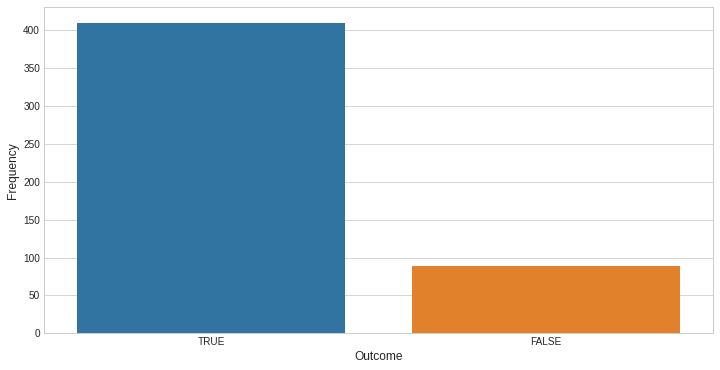

In [29]:
#checking for balance of the target. It shows the target is imbalance. I am using scale_pos_weight in xgb to remove the imbalance from the dataset
print(Procedure_info_outcomes['Outcome'].value_counts(dropna=False, normalize=True).head())

#####Visualizing the Target ( Outcome of the Procedure)
plt.figure(figsize =(12,6));
sns.countplot(x = 'Outcome', data = Procedure_info_outcomes);
plt.xlabel("Outcome",fontsize = 12);
plt.ylabel("Frequency",fontsize = 12);


In [30]:
####Converting the Procedure ID and Time taken for the procedure to int and float respectively.
Procedure_info_outcomes['procedure_id'] = Procedure_info_outcomes['procedure_id'].astype(str).astype(int)
Procedure_info_outcomes['Time in Hours'] = Procedure_info_outcomes['Time in Hours'].astype(str).astype(float)


#####Imputing the Null values in Time(in hours) columns with the mean of that columns.
Procedure_info_outcomes["Time in Hours"] = Procedure_info_outcomes["Time in Hours"].fillna(value=Procedure_info_outcomes["Time in Hours"].mean())


####Printing the info of the whole dataset
Procedure_info_outcomes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499 entries, 0 to 498
Data columns (total 11 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   procedure_id                              499 non-null    int64  
 1   Outcome                                   499 non-null    object 
 2   Procedure                                 499 non-null    object 
 3   Time in Hours                             499 non-null    float64
 4   Severity                                  499 non-null    object 
 5   Gender                                    499 non-null    object 
 6   anesthesia                                499 non-null    object 
 7   diabetes                                  499 non-null    object 
 8   severity of post procedure complications  499 non-null    object 
 9   Pain                                      499 non-null    object 
 10  recurrence of original condition      

In [31]:
#mapping the target the variable

Procedure_info_outcomes['Outcome']=Procedure_info_outcomes['Outcome'].map({'TRUE': 0, 'FALSE': 1})
Procedure_info_outcomes.head(4)

,procedure_id,Outcome,Procedure,Time in Hours,Severity,Gender,anesthesia,diabetes,severity of post procedure complications,Pain,recurrence of original condition
0,1,0,AAA Repair,3.0,Low,Male,Yes,Yes,High,Yes,No
1,2,0,Pancreatic Resection_Cancer,1.0,Medium,Female,Yes,No,Low,No,No
2,3,0,Laminectomy,1.0,Medium,Female,Yes,No,Low,No,No
3,4,0,AAA Repair_Ruptured_Endovascular,2.0,Medium,Male,Yes,Yes,Medium,Yes,Yes


In [32]:
#Separate categorical and numerical columns
cat_column = Procedure_info_outcomes.dtypes[Procedure_info_outcomes.dtypes == 'object']
num_column = Procedure_info_outcomes.dtypes[Procedure_info_outcomes.dtypes != 'object']


#####SHowing the cateogries in each columns with thier total and %
for col in list(cat_column.index):
    print(f"--------------------{col.title()}-------------------------")
    total= Procedure_info_outcomes[col].value_counts()
    percent = total / Procedure_info_outcomes.shape[0]
    df = pd.concat([total,percent],keys = ['total','percent'],axis = 1)
    print(df)
    #print('\n')

--------------------Procedure-------------------------
                                     total   percent
Pancreatic Resection                    33  0.066132
Radiosurgery                            29  0.058116
AAA Repair_Ruptured_Open                24  0.048096
Laminectomy                             23  0.046092
Lithotriptor                            19  0.038076
General surgery                         18  0.036072
Pancreatic Resection_Cancer             17  0.034068
Amputation                              16  0.032064
Lithotomy                               16  0.032064
Xenotransplantation                     16  0.032064
Ablation                                16  0.032064
Endoscopic surgery                      15  0.030060
Esophageal Resection                    15  0.030060
Facial rejuvenation                     14  0.028056
PCI                                     14  0.028056
AAA Repair_Ruptured_Endovascular        14  0.028056
Stereotactic surgery                    14  

In [33]:
####As we can see from above, we have Nulls in few of the columns which are categories, You cant impute 0 or a number for categories, so imputing Not_listed for NUlls

edit_columns = ['Severity', 'Gender', 'anesthesia', 
             'diabetes', 'Pain','recurrence of original condition' ]

# Replace NaN with Not_Listed
for col in edit_columns:
    Procedure_info_outcomes.loc[Procedure_info_outcomes[col] == 'NaN', col] = 'Not_listed'

In [34]:
# Check if NAN is present
for col in edit_columns:
    print(f"NaN in {col}: {Procedure_info_outcomes[(Procedure_info_outcomes[col] == 'NaN')].any().sum()}")

NaN in Severity: 0
NaN in Gender: 0
NaN in anesthesia: 0
NaN in diabetes: 0
NaN in Pain: 0
NaN in recurrence of original condition: 0


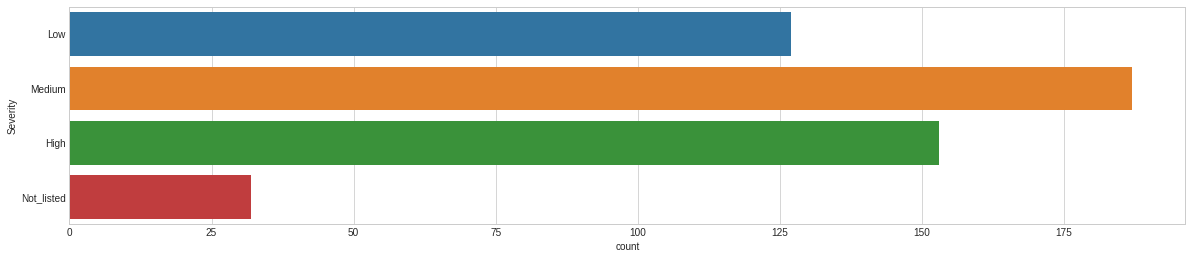

In [35]:
####Visualizing the Severity category and its distrubution

from scipy import interp
import seaborn as sns
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
from matplotlib import rcParams

plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,4)) 
sns.countplot(y="Severity", data=Procedure_info_outcomes);

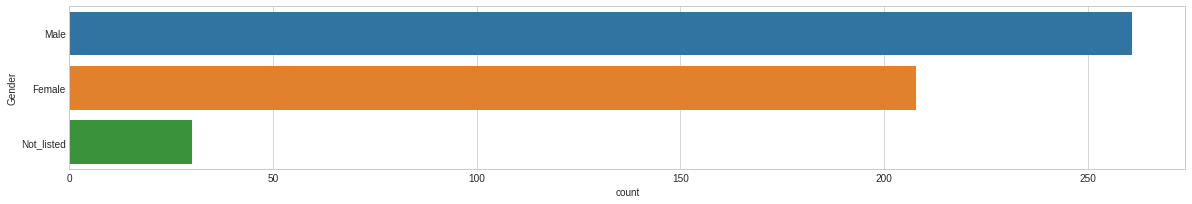

In [36]:
####Visualizing the Gender category and its distrubution

plt.figure(figsize=(20,3)) 
sns.countplot(y="Gender", data=Procedure_info_outcomes);

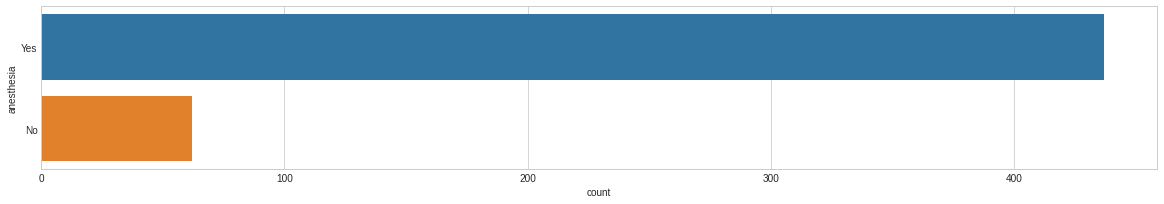

In [37]:
####Visualizing the anesthesia category and its distrubution

plt.figure(figsize=(20,3)) 
sns.countplot(y="anesthesia", data=Procedure_info_outcomes);

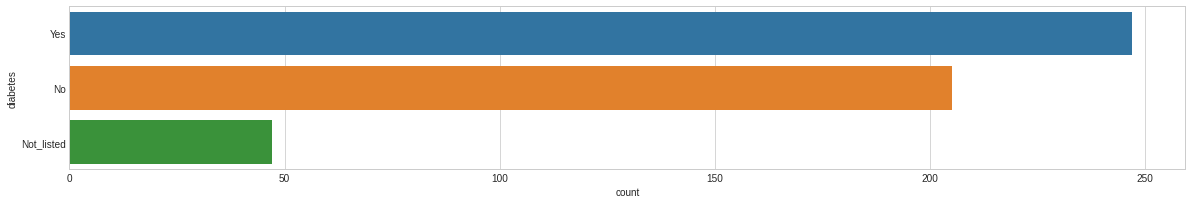

In [38]:
####Visualizing the diabetes category and its distrubution

plt.figure(figsize=(20,3)) 
sns.countplot(y="diabetes", data=Procedure_info_outcomes);

**Once, analysis has been done from the above visualzations, we get to know about each feature distrubtion and relation to the target column. 
As I dont have many features in this dataset, I am not able to do much deeper analysis like outlier detection, 
feature selection methods( choosing top 95% important features) for model training**

**I am not doing scaling on my feature set because xgboost will handle it in the model training part.**

In [39]:
#Applying label encoding to Severity, severity of post procedure complications as this columns induces order/precedence

from sklearn import preprocessing 

label_encoder = preprocessing.LabelEncoder() 

Procedure_info_outcomes['Severity']= label_encoder.fit_transform(Procedure_info_outcomes['Severity']) 
Procedure_info_outcomes['severity of post procedure complications']= label_encoder.fit_transform(Procedure_info_outcomes['severity of post procedure complications']) 
   

####Mapping the other columns which either Yes or No
Procedure_info_outcomes['Gender']=Procedure_info_outcomes['Gender'].map({'Male': 0, 'Female': 1, 'Not_listed' : 99})
Procedure_info_outcomes['anesthesia']=Procedure_info_outcomes['anesthesia'].map({'Yes': 0, 'No': 1,'Not_listed' : 99})
Procedure_info_outcomes['diabetes']=Procedure_info_outcomes['diabetes'].map({'Yes': 0, 'No': 1,'Not_listed' : 999})
Procedure_info_outcomes['recurrence of original condition']=Procedure_info_outcomes['recurrence of original condition'].map({'Yes': 0, 'No': 1,'Not_listed' : 99})
Procedure_info_outcomes['Pain']=Procedure_info_outcomes['Pain'].map({'Yes': 0, 'No': 1,'Not_listed' : 99})



####Doing one-hot encoding for Procedure. Having Procedure as a feature will help the model understand the which procedure has more chances of success or failure
Procedure_info_outcomes_final = pd.concat([Procedure_info_outcomes,pd.get_dummies(Procedure_info_outcomes['Procedure'],prefix = 'Procedure')], axis =1 )


#### Cleaning the column names and dropping procedure as we did OHE on procedure column
import re
Procedure_info_outcomes_final = Procedure_info_outcomes_final.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
Procedure_info_outcomes_final = Procedure_info_outcomes_final.drop(['Procedure'], axis =1)

Procedure_info_outcomes_final = Procedure_info_outcomes_final.astype(float)
Procedure_info_outcomes_final.head(2)


,procedure_id,Outcome,TimeinHours,Severity,Gender,anesthesia,diabetes,severityofpostprocedurecomplications,Pain,recurrenceoforiginalcondition,...,Procedure_Lobotomy,Procedure_Neovaginoplasty,Procedure_PCI,Procedure_PancreaticResection,Procedure_PancreaticResection_Cancer,Procedure_Procedure,Procedure_Radiosurgery,Procedure_Stereotacticsurgery,Procedure_Vaginoplasty,Procedure_Xenotransplantation
0,1.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,0.0,1.0,2.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [40]:
#####I am using train_test_split to seperate my main test data mimicking as a unseen data(future data) from the dataset. 
#####I have my train dataset on which I do model training and cv etc.

from sklearn.model_selection import train_test_split

train, test = train_test_split(Procedure_info_outcomes_final, test_size=0.25)

X_train = train.drop(['Outcome'], axis =1)
y_train = train['Outcome'].copy()

X_test = test.drop('Outcome', axis =1)

####I have 125 records as my unseen test data on which I will be predicting
X_test.shape

(125, 43)

In [64]:

#####Below code is for Hyper parameter tuning using Hyperopt. 
#####I have tried lightgbm with bayesian optimization but it didnt fetch good results, so sticking with Hyperopt and XGB

from hyperopt import fmin, tpe, hp, anneal, Trials,STATUS_OK
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score


n_iter=300       ###Number of iterations the optimization function will run for
random_state=10  ###Setting the state of the function
num_folds=12     ###Number of folds for CV

kf = KFold(n_splits=num_folds)  ### I am using KFold cross validation
NFOLDS = 12  ##Number of folds
def score(params, random_state=random_state, cv=kf, X=X_train, y=y_train):
    # the function gets a set of variable parameters in "params"
    params = {
             'colsample_bytree': int(params['colsample_bytree']),
             'max_depth': int(params['max_depth']),
             'lambda':params['lambda'],
             'gamma': params['gamma'],
             'scale_pos_weight' : 0.219,                      ###for the imblance of the target variable
            'objective' : 'binary:logistic',                  ###for classification
             'min_child_weight' : int(params['min_child_weight']),
             'eta': params['eta'],
             'n_estimators': int(params['n_estimators'])}
    model = xgb.XGBClassifier(random_state=random_state, **params,verbose_eval=200, early_stopping_rounds=50, stratified=True) 
    ###Used stratified = True for each distribution of target in each fold.
   
    # and then conduct the cross validation with the same folds as before
    accuracies  = -cross_val_score(model, X, y, cv=cv, scoring="roc_auc", n_jobs=-1)
    
    CrossValMean = accuracies.mean()

    print("CrossValMean:", CrossValMean)

    return{'loss':1-CrossValMean, 'status': STATUS_OK } 

In [65]:
#spacefor hyperopt
space={
  
       'colsample_bytree': hp.quniform('colsample_bytree', 0.5, 1,0.1),
       'gamma': hp.quniform('gamma', 0, 1,0.1),
       'lambda': hp.quniform('lambda', 1, 2,0.1),
       'min_child_weight' : hp.quniform('min_child_weight', 1, 30, 1),
       'eta': hp.quniform('eta', 0.01, 0.2,0.01),
       'max_depth' : hp.quniform('max_depth', 2, 30, 1),
       'n_estimators' : hp.quniform('n_estimators', 30, 200, 1)
 
      }


###Running the fmin function
best = fmin(fn=score,
            space=space,
            algo=tpe.suggest,
            max_evals=n_iter, # maximum number of iterations
            #max_concurrent=10, # logging
            rstate=np.random.RandomState(random_state))
 
    
#printing the best params from hyperopt
print(best)

#params from the best
params = {'colsample_bytree': (best['colsample_bytree']),
                 'eta': best['eta'],
                 'gamma': best['gamma'],
                 'lambda': best['lambda'],
                 'max_depth': int(best['max_depth']),
                 'min_child_weight': best['min_child_weight'],
                 'n_estimators':int(best['n_estimators'])}
###Getting the best params from the Hyperopt
params

CrossValMean:                                          
-0.7837567833401166                                    
CrossValMean:                                                                    
-0.7923339777506445                                                              
CrossValMean:                                                                    
-0.8120386480803147                                                              
CrossValMean:                                                                    
-0.7923339777506445                                                              
CrossValMean:                                                                    
-0.8083547008547008                                                              
CrossValMean:                                                                    
-0.7924772758106092                                                              
CrossValMean:                                                       

-0.7923339777506445                                                 
CrossValMean:                                                       
-0.7674699837199838                                                 
CrossValMean:                                                       
-0.5                                                                
CrossValMean:                                                       
-0.7578451024284357                                                 
CrossValMean:                                                       
-0.5957605820105821                                                 
CrossValMean:                                                       
-0.7561784357617691                                                 
CrossValMean:                                                       
-0.7923339777506445                                                 
CrossValMean:                                                       
-0.7923339777506445               

-0.5                                                                
CrossValMean:                                                       
-0.5                                                                
CrossValMean:                                                       
-0.5                                                                
CrossValMean:                                                       
-0.7940055623388956                                                 
CrossValMean:                                                       
-0.5412301587301588                                                 
CrossValMean:                                                       
-0.7401093813593814                                                 
CrossValMean:                                                       
-0.8014129697463029                                                 
CrossValMean:                                                       
-0.5                              

{'colsample_bytree': 0.6000000000000001,
 'eta': 0.16,
 'gamma': 0.5,
 'lambda': 1.8,
 'max_depth': 27,
 'min_child_weight': 28.0,
 'n_estimators': 176}

**Second script the running the trained model and predict on the test data**

In [67]:
####Now as we have the best params from the above hyperopt optimization function, we use these best params and run a manual CV and fit it on our train set.

from sklearn.metrics import roc_auc_score
train = xgb.DMatrix(X_train)
folds = KFold(n_splits=NFOLDS)
columns = X_train.columns
splits = folds.split(X_train, y_train)
y_preds = np.zeros(X_test.shape[0])
y_oof = np.zeros(X_train.shape[0])
score = 0

####Manual CV
for fold_n, (train_index, valid_index) in enumerate(splits):
    X_train_again, X_valid_again = X_train[columns].iloc[train_index], X_train[columns].iloc[valid_index]
    y_train_again, y_valid_again = y_train.iloc[train_index], y_train.iloc[valid_index]
    dtrain_again = xgb.DMatrix(X_train_again, label=y_train_again)
    dvalid_again = xgb.DMatrix(X_valid_again,label=y_valid_again)
    watchlist = [(dtrain_again, 'dtrain_again'), (dvalid_again, 'dvalid_again')]
    clf = xgb.train(params, dtrain_again,int(best['n_estimators']),  verbose_eval=200, early_stopping_rounds=50,evals = watchlist)
    y_pred_valid = clf.predict(xgb.DMatrix(X_valid_again))
    y_oof[valid_index] = y_pred_valid
    print(f"Fold {fold_n + 1} | ROC_AUC: {roc_auc_score(y_valid_again, y_pred_valid)}")
    score += roc_auc_score(y_valid_again, y_pred_valid) / NFOLDS
    #y_preds is on test dataset
    y_preds += clf.predict(xgb.DMatrix(X_test)) / NFOLDS
    ###Getting the index of the X_test, as it would be easy to join the test dataset later on.
    valid_individual_test=pd.DataFrame()
    valid_individual_test['val_idx']=X_test.index
    valid_individual_test['pred']=y_preds
###Pred_main is our final dataframe with the predictions as asked in the problem statement.
pred_main = valid_individual_test.set_index('val_idx')
    

####Below you can see the ROC_AUC score for each fold in the train dataset.

[17:42:20] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	dtrain_again-rmse:0.46699	dvalid_again-rmse:0.46711
Multiple eval metrics have been passed: 'dvalid_again-rmse' will be used for early stopping.

Will train until dvalid_again-rmse hasn't improved in 50 rounds.
Stopping. Best iteration:
[63]	dtrain_again-rmse:0.30813	dvalid_again-rmse:0.32817

Fold 1 | ROC_AUC: 0.8074074074074075
[17:42:20] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [68]:
####Joining the predictions with the test dataset based on index.

test_df = test[['procedure_id','Outcome']]
test_df = pd.merge(test_df, pred_main, left_index= True, right_index = True)
test_df.head(3)

,procedure_id,Outcome,pred
6,7.0,0.0,0.023622
356,357.0,1.0,0.304560
212,213.0,0.0,0.041198


In [69]:
####Accuracy on the Unseen data is 82.4% 

from sklearn.metrics import accuracy_score
test_df.pred = test_df.pred.round()
accuracy = accuracy_score(test_df['Outcome'], test_df['pred'])
accuracy

0.824

**FUTURE SCOPE:**

1. Do feature engineering, Create more features, so that model would understand better and get better accuracy.
2. Run feature selection methods to get top 95% features as it removes nosie from the dataset.
3. Check for outliers. I would keep the outlier in the dataset as it would create more robustness of the model because if we drop the outliers and if unseen data has outliers, then our model has never seen outliers. It would underfit the data.
4. Run various optimzation methods like optuna, bayesian and run various algorithms like lightgbm, catboost. 